# Milestone 1 – Citi Bike Boston: Vorhersage der Fahrtzeit

**Datensatz**: [Citi Bike Boston Trip Data](https://s3.amazonaws.com/hubway-data/202408-bluebikes-tripdata.zip), August 2024
**Prediction Task**: In this Project we are trying to predict the development of the usage from electronic and classics Bikes in the area of Boston. We will be looking at different years of months an compare the data to understand the development over the last few years and with that develop a prediction model for the future usage of bikes. We also want to include weather data as an additional feature to improve the data. We do this because we think there is a correlation between the weather and the willingness to use bikes. As for the predictive Model we choose the regression Model.



**Planned Features:**

- Start time (`started_at`)
- Day of the week (`weekday`)
- Time of day category (`time_of_day`)
- Duration Time in Minutes (`minutes`)
- Start station (`start_station_id`)
- User type (`member_casual`)
- Weather (optional: temperature, rain)

This project uses data from August 2024, comprising approximately 530,000 trips.

In [5]:
import pandas as pd

csv_path = r"C:\Users\hanac\PycharmProjects\Data-Science-and-Machine-Learning\202408-bluebikes-tripdata.csv"

df = pd.read_csv(
    csv_path,
    engine="python",
    sep=None,
    on_bad_lines="skip",

)

print(df.shape)
df.head(1000000000)


(538262, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9555B91492D25570,classic_bike,01.08.2024 07:10,01.08.2024 07:26,Main St at Baldwin St,D32036,Purchase St at Pearl St,A32026,42.380.857,-71.070.629,42.354.659,-71.053.181,member
1,82D93E8BDD45E43F,electric_bike,12.08.2024 15:43,12.08.2024 15:46,75 Binney St,M32064,Cambridge Crossing at North First Street,M32077,4.236.550.728.505.650,-710.801.375.997.653,42.371.141,-71.076.198,member
2,C99E6E4F4C76DFF9,classic_bike,28.08.2024 21:06,28.08.2024 21:10,Copley Square - Dartmouth St at Boylston St,D32005,Prudential Center - 101 Huntington Ave,C32007,4.234.992.828.230.050,-7.107.739.206.866.420,4.234.652.003.998.410,-7.108.065.776.545.110,member
3,AB67BC6000A4D4CE,classic_bike,11.08.2024 13:14,11.08.2024 13:21,Ink Block - Harrison Ave at Herald St,C32025,Massachusetts Ave at Columbus Ave,C32004,42.345.901,-71.063.187,42.340.835,-710.816.197,member
4,C0B1FA5CE04B942F,electric_bike,12.08.2024 10:43,12.08.2024 11:59,Copley Square - Dartmouth St at Boylston St,D32005,Prudential Center - 101 Huntington Ave,C32007,4.234.992.828.230.050,-7.107.739.206.866.420,4.234.652.003.998.410,-7.108.065.776.545.110,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
538257,7C21E3D56C7059C4,electric_bike,01.08.2024 17:01,2024-08-01 17:08:40.036,Nashua Street at Red Auerbach Way,A32025,CambridgeSide Galleria - CambridgeSide PL at L...,M32019,42.365.673,-71.064.263,42.367.074.071.490.900,-7.107.679.277.658.460,member
538258,EF474D39EC6642EE,electric_bike,05.08.2024 12:23,05.08.2024 12:29,Commonwealth Ave at Agganis Way,A32002,Silber Way,D32032,4.235.169.201.885.970,-7.111.903.488.636.010,4.234.949.599.514.000,-7.110.057.592.391.960,member
538259,702A2E66C5554807,classic_bike,20.08.2024 21:32,20.08.2024 21:57,Nashua Street at Red Auerbach Way,A32025,Somerville High School & Central Library,S32048,42.365.673,-71.064.263,423.864,-7.109.601,member
538260,413E52E8A16DF605,classic_bike,26.08.2024 09:36,26.08.2024 09:47,Nashua Street at Red Auerbach Way,A32025,75 Binney St,M32064,42.365.673,-71.064.263,4.236.550.728.505.650,-710.801.375.997.653,member


In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538262 entries, 0 to 538261
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ride_id             538262 non-null  object
 1   rideable_type       538262 non-null  object
 2   started_at          538262 non-null  object
 3   ended_at            538262 non-null  object
 4   start_station_name  538078 non-null  object
 5   start_station_id    538078 non-null  object
 6   end_station_name    537336 non-null  object
 7   end_station_id      537270 non-null  object
 8   start_lat           538262 non-null  object
 9   start_lng           538262 non-null  object
 10  end_lat             537860 non-null  object
 11  end_lng             537860 non-null  object
 12  member_casual       538262 non-null  object
dtypes: object(13)
memory usage: 53.4+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,538262,538262,538262,538262,538078,538078,537336,537270,538262,538262,537860,537860,538262
unique,538262,2,94485,93511,498,497,498,497,33091,33835,521,524,2
top,9555B91492D25570,classic_bike,08.08.2024 17:16,19.08.2024 17:34,MIT at Mass Ave / Amherst St,M32006,MIT at Mass Ave / Amherst St,M32006,423.581,-71.093.198,423.581,-71.093.198,member
freq,1,404849,60,58,8276,8276,7965,7965,8032,8032,7965,7965,357704


In [7]:
import pandas as pd


csv_path = r"C:\Users\hanac\PycharmProjects\Data-Science-and-Machine-Learning\202408-bluebikes-tripdata.csv"
df = pd.read_csv(csv_path, engine="python", sep=None, on_bad_lines="warn")

print("Ursprünglicher Datensatz:")
print(df.shape)


df['started_at'] = pd.to_datetime(df['started_at'], dayfirst=True, errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], dayfirst=True, errors='coerce')
print("Nach datetime-Konvertierung:")
print(df.shape)


df = df.dropna(subset=['started_at', 'ended_at'])
print("Nach Entfernen von NaT-Zeilen:")
print(df.shape)


df['tripduration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()


df = df[df['tripduration'] > 0]
print("Nach Entfernen negativer/0-Fahrzeiten:")
print(df.shape)


df['tripduration'] = pd.to_numeric(df['tripduration'], errors='coerce')


df['duration_min'] = df['tripduration'] / 60


print("\n Spaltentypen von tripduration und duration_min:")
print(df[['tripduration', 'duration_min']].dtypes)

print("\n Beispielhafte Einträge:")
print(df[['started_at', 'ended_at', 'tripduration', 'duration_min']].head())


Ursprünglicher Datensatz:
(538262, 13)
Nach datetime-Konvertierung:
(538262, 13)
Nach Entfernen von NaT-Zeilen:
(435181, 13)
Nach Entfernen negativer/0-Fahrzeiten:
(435181, 14)

 Spaltentypen von tripduration und duration_min:
tripduration    float64
duration_min    float64
dtype: object

 Beispielhafte Einträge:
           started_at            ended_at  tripduration  duration_min
0 2024-08-01 07:10:00 2024-08-01 07:26:00         960.0          16.0
1 2024-08-12 15:43:00 2024-08-12 15:46:00         180.0           3.0
2 2024-08-28 21:06:00 2024-08-28 21:10:00         240.0           4.0
3 2024-08-11 13:14:00 2024-08-11 13:21:00         420.0           7.0
4 2024-08-12 10:43:00 2024-08-12 11:59:00        4560.0          76.0


In [8]:

df['weekday'] = df['started_at'].dt.weekday
df['hour'] = df['started_at'].dt.hour


def get_time_category(hour):
    if 6 <= hour < 12:
        return 'Morgen'
    elif 12 <= hour < 18:
        return 'Nachmittag'
    elif 18 <= hour < 24:
        return 'Abend'
    else:
        return 'Nacht'

df['time_of_day'] = df['hour'].apply(get_time_category)


## Nächste Schritte (Milestone 2+)

The next steps will include the data preparation. Our goal here will be to sort the Data of the days of the month in time boxes for example morning, noon, afternoon, evening etc. With this we can accumulate the highest average of use-time through the day as well as highest and lowest peaks.


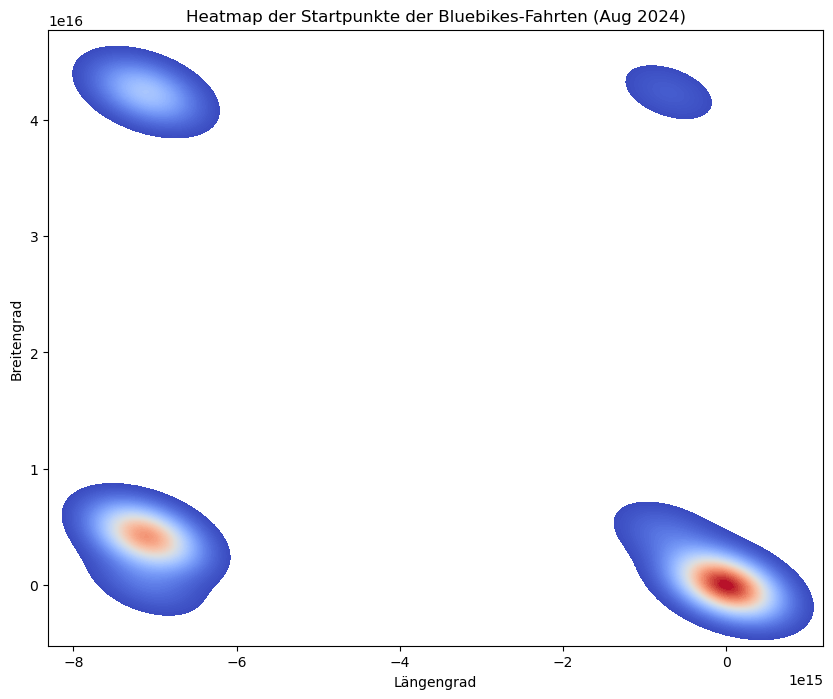

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV mit Semikolon als Trennzeichen einlesen
df_trips = pd.read_csv('202408-bluebikes-tripdata.csv', sep=';', on_bad_lines='skip')

# Datum konvertieren
df_trips['started_at'] = pd.to_datetime(df_trips['started_at'], format='%d.%m.%Y %H:%M', errors='coerce')
df_trips = df_trips.dropna(subset=['started_at'])

# Koordinaten-Spalten bereinigen: Punkte entfernen und dann in float konvertieren
for col in ['start_lat', 'start_lng', 'end_lat', 'end_lng']:
    # Entferne alle Punkte in den Strings (Punkte als Tausender-Trenner!)
    df_trips[col] = df_trips[col].astype(str).str.replace('.', '', regex=False)
    # Nun in float umwandeln, Fehler als NaN behandeln
    df_trips[col] = pd.to_numeric(df_trips[col], errors='coerce')

# Filtere ungültige Koordinaten raus (optional, je nachdem wie viel Daten du hast)
df_trips = df_trips.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng'])

# Beispiel: Heatmap der Startpunkte (Startstationen) visualisieren
plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=df_trips['start_lng'],
    y=df_trips['start_lat'],
    cmap="coolwarm",
    fill=True,
    thresh=0.05,
    levels=100
)
plt.title('Heatmap der Startpunkte der Bluebikes-Fahrten (Aug 2024)')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


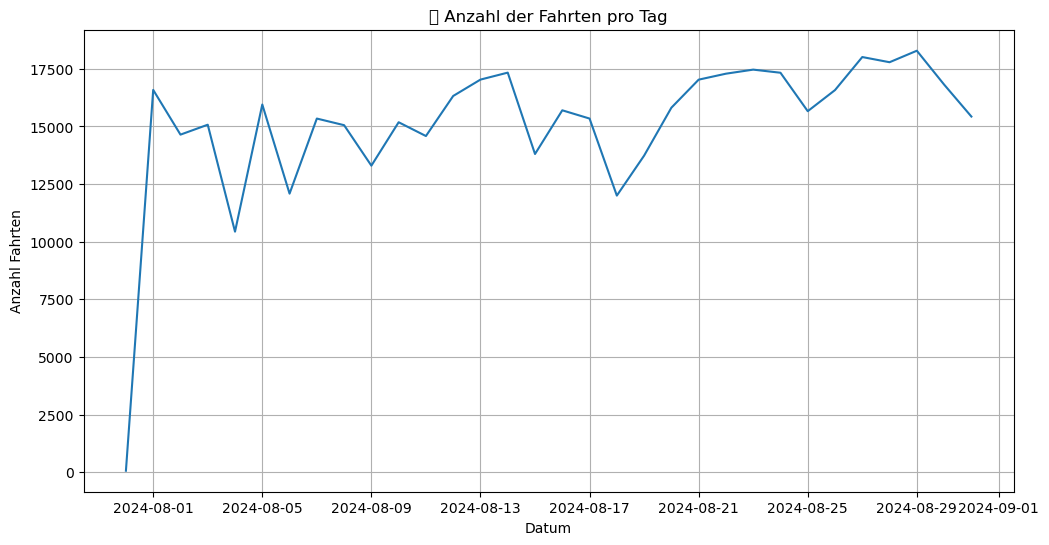

In [16]:
df_trips['date'] = df_trips['started_at'].dt.date
fahrten_pro_tag = df_trips.groupby('date').size()

plt.figure(figsize=(12,6))
fahrten_pro_tag.plot()
plt.title("📅 Anzahl der Fahrten pro Tag")
plt.xlabel("Datum")
plt.ylabel("Anzahl Fahrten")
plt.grid()
plt.show()


<Axes: title={'center': 'Daily Bluebikes Trip Count (Aug 2024)'}, xlabel='started_at'>

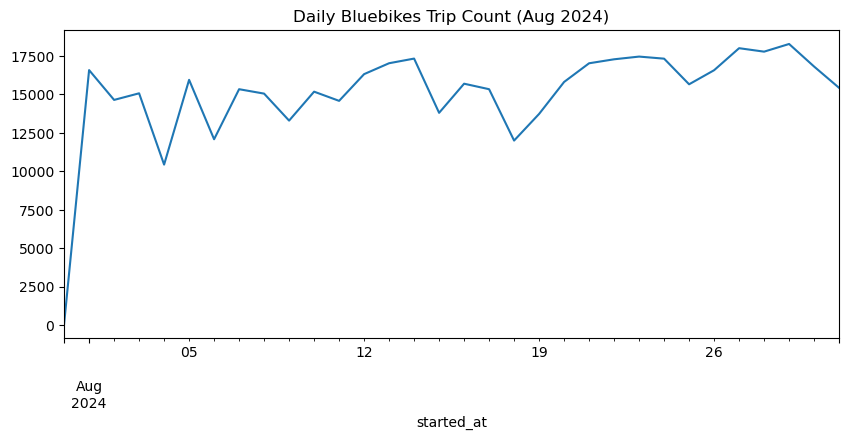

In [17]:
# Create a datetime index for convenience
df_trips['started_at'] = pd.to_datetime(df_trips['started_at'])
df_trips.set_index('started_at', inplace=True)

# Calculate daily trip counts
daily_counts = df_trips.resample('D').size()
daily_counts.plot(title='Daily Bluebikes Trip Count (Aug 2024)', figsize=(10,4))
